### Initialize the environment

In [1]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/OV_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [5]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [67]:
run=1
date_time='2017-02-18_1417' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [68]:
config

{u'dbns': {u'DM': {u'batchSize': 5,
   u'datafile': u'TCGA_Data/3.Methylation_0.5.out',
   u'epochs': [2, 800],
   'inputNodes': 15418,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': False},
  u'GE': {u'batchSize': 5,
   u'datafile': u'TCGA_Data/3.GE1_0.5.out',
   u'epochs': [2, 800],
   'inputNodes': 16046,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': False},
  u'ME': {u'batchSize': 5,
   u'datafile': u'TCGA_Data/3.miRNA_0.5.out',
   u'epochs': [2],
   'inputNodes': 799,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.0005],
   u'persistent': False}},
 u'p': 1.0,
 u'pathways': [u'ME', u'GE', u'DM'],
 u'runs': 5,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 120,
  u'k': 5,
  u'layersNodes': [24, 3],
  u'lr': [0.1, 0.1],
  u'persistent': False},
 u'uuid': u'7cd819693d30d5d171bf943664705641

### Load the dataset and visualize the input of the pathways

In [69]:
datafiles = main.prepare_TCGA_datafiles("OV",config,data_dir)

### Look at the joint layer representation

In [70]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

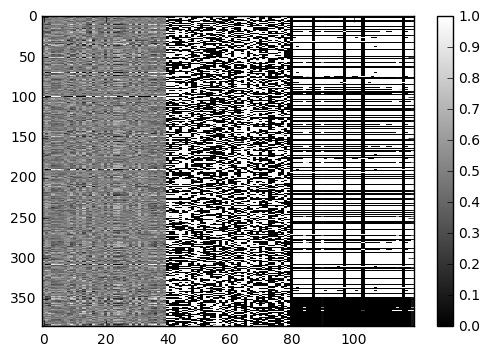

In [71]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

### Check the weights distributions

([array([  0.00000000e+00,   2.50000000e+01,   3.73000000e+02,
           2.54500000e+03,   6.12700000e+03,   5.22100000e+03,
           1.58900000e+03,   1.61000000e+02,   5.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   1.00000000e+01,   2.97000000e+02,
           2.30900000e+03,   6.34900000e+03,   5.42700000e+03,
           1.52400000e+03,   1.26000000e+02,   4.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   1.30000000e+01,   3.46000000e+02,
           2.48500000e+03,   6.32300000e+03,   5.29200000e+03,
           1.45600000e+03,   1.28000000e+02,   3.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   1.20000000e+01,   3.34000000e+02,
           2.55700000e+03,   6.38000000e+03,   5.20700000e+03,
           1.41000000e+03,   1.41000000e+02,   5.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   7.00000000e+00,   3.01000000e+02,
           2.48000000e+03,   6.37500000e+03,   5.30600000e+03,
  

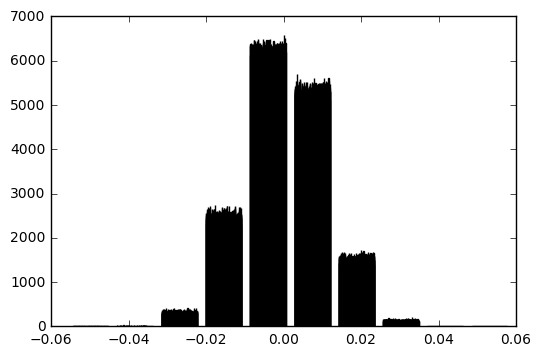

In [72]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x11cbcfc50>,
 <a list of 3 Text xticklabel objects>)

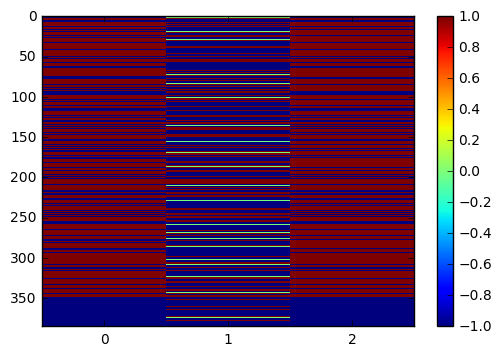

In [73]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x11c755c10>,
 <a list of 3 Text xticklabel objects>)

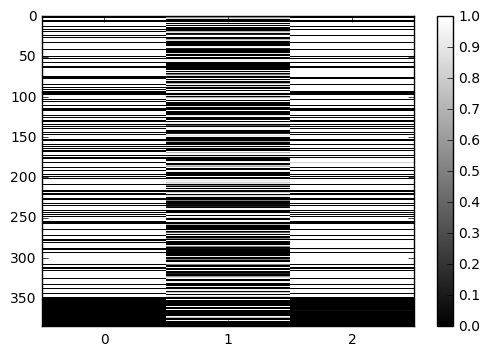

In [74]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0], cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 149.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  236.]),
  array([ 226.,    6.,    0.,    3.,    3.,    6.,    9.,    5.,   10.,  117.]),
  array([ 132.,    0.,    0.,    0.,    0.,    2.,    0.,    0.,    2.,  249.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 3 Lists of Patches objects>)

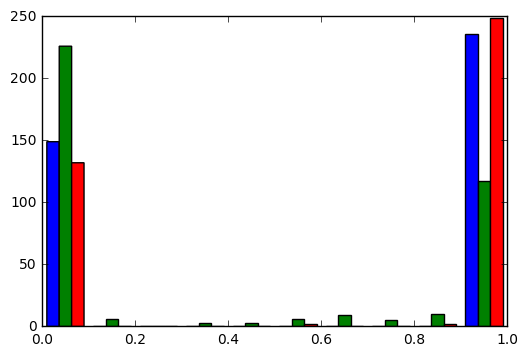

In [75]:
plt.hist(top_output)

In [76]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [77]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([  89.,   10.,   43.,    7.,  139.,   97.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Patch objects>)

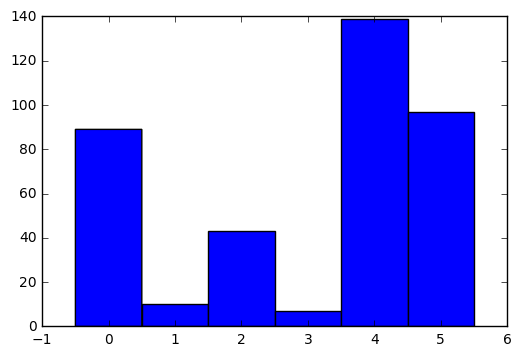

In [78]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [79]:
import csv
id=[]
with open('../data/'+datafiles['ME']) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [80]:
stat={}
with open('../data/TCGA_Data/data_bcr_clinical_data_patient.csv') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        patient_id=row[1]
        stat[patient_id]=(row[15],row[16],row[17])

In [81]:
import re
time_list = []
event_list = []
group_list = []
DEAD=1
ALIVE=0
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(DEAD)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(ALIVE)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
TCGA-24-0981
No data for TCGA-04-1519
No data for TCGA-04-1360
TCGA-01-0639
TCGA-01-0642
No data for TCGA-04-1357
TCGA-01-0628
TCGA-04-1331
TCGA-01-0636
TCGA-01-0633
TCGA-01-0637
TCGA-01-0631
TCGA-01-0630


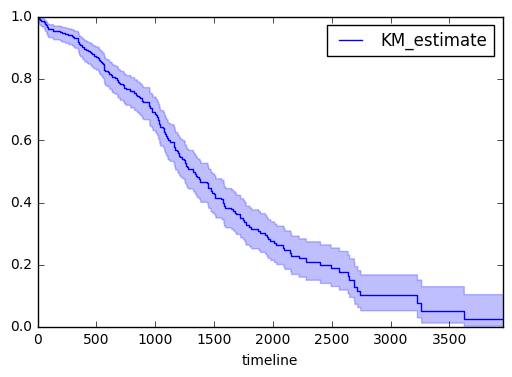

In [82]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

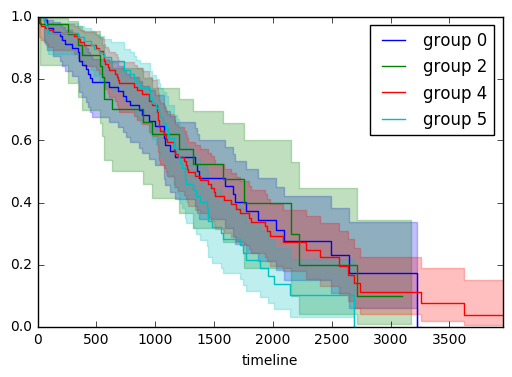

In [83]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [2,4,5]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)